In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "BBCA.JK"
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,
2004-06-08,102.763664,104.211040,101.316289,101.316289,499150000
2004-06-09,104.211044,105.658420,101.316293,102.763669,294290000
2004-06-10,104.211044,104.211044,102.763669,104.211044,165590000
2004-06-11,104.211044,104.211044,102.763669,102.763669,135830000
2004-06-14,102.763664,104.211040,101.316289,104.211040,158540000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
Date,,,,,
2025-01-03,9850.0,9925.0,9825.0,9850.0,41916000
2025-01-06,9675.0,9875.0,9650.0,9850.0,41593900
2025-01-07,9525.0,9725.0,9525.0,9675.0,71318600
2025-01-08,9675.0,9775.0,9575.0,9675.0,55943100
2025-01-09,9850.0,9875.0,9725.0,9750.0,42733800


In [5]:
df.shape

(5092, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5092 entries, 2004-06-08 to 2025-01-09
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BBCA.JK)   5092 non-null   float64
 1   (High, BBCA.JK)    5092 non-null   float64
 2   (Low, BBCA.JK)     5092 non-null   float64
 3   (Open, BBCA.JK)    5092 non-null   float64
 4   (Volume, BBCA.JK)  5092 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 238.7 KB


In [7]:
df.isnull().sum()

,,0
Price,Ticker,
Close,BBCA.JK,0
High,BBCA.JK,0
Low,BBCA.JK,0
Open,BBCA.JK,0
Volume,BBCA.JK,0


In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
count,5092.000000,5092.000000,5092.000000,5092.000000,5.092000e+03
mean,3104.121582,3132.730237,3074.859622,3104.230497,1.066868e+08
std,2909.890678,2933.271004,2887.208117,2910.137654,1.282122e+08
min,102.763664,102.763664,101.316289,101.316289,0.000000e+00
25%,581.561798,590.358531,574.719797,581.561798,4.922275e+07
50%,2031.382935,2063.322807,2024.994771,2042.017273,7.263875e+07
75%,5251.133789,5291.747070,5188.747401,5246.127939,1.153232e+08
max,10895.657227,10895.657227,10721.525438,10845.905036,1.949960e+09


In [9]:
df = df.reset_index()

In [10]:
df.shape

(5092, 6)

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
0,2004-06-08,102.763664,104.211040,101.316289,101.316289,499150000
1,2004-06-09,104.211044,105.658420,101.316293,102.763669,294290000
2,2004-06-10,104.211044,104.211044,102.763669,104.211044,165590000
3,2004-06-11,104.211044,104.211044,102.763669,102.763669,135830000
4,2004-06-14,102.763664,104.211040,101.316289,104.211040,158540000


In [12]:
df.columns

MultiIndex([(  'Date',        ''),
            ( 'Close', 'BBCA.JK'),
            (  'High', 'BBCA.JK'),
            (   'Low', 'BBCA.JK'),
            (  'Open', 'BBCA.JK'),
            ('Volume', 'BBCA.JK')],
           names=['Price', 'Ticker'])

In [16]:
data01 = df.to_csv('bbca.csv')

In [17]:
data01 = pd.read_csv('bbca.csv')

In [18]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
1,0,2004-06-08,102.76366424560547,104.21103979836047,101.31628869285046,101.31628869285046,499150000
2,1,2004-06-09,104.21104431152344,105.65841992696127,101.3162930806478,102.76366869608562,294290000
3,2,2004-06-10,104.21104431152344,104.21104431152344,102.76366869608562,104.21104431152344,165590000
4,3,2004-06-11,104.21104431152344,104.21104431152344,102.76366869608562,102.76366869608562,135830000


In [19]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data01['Date'],
                open=data01['Open'], high=data01['High'],
                low=data01['Low'], close=data01['Close'])])

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [21]:
df = df.drop(['Date'], axis = 1)

<ipython-input-21-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [22]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
0,102.763664,104.211040,101.316289,101.316289,499150000
1,104.211044,105.658420,101.316293,102.763669,294290000
2,104.211044,104.211044,102.763669,104.211044,165590000
3,104.211044,104.211044,102.763669,102.763669,135830000
4,102.763664,104.211040,101.316289,104.211040,158540000


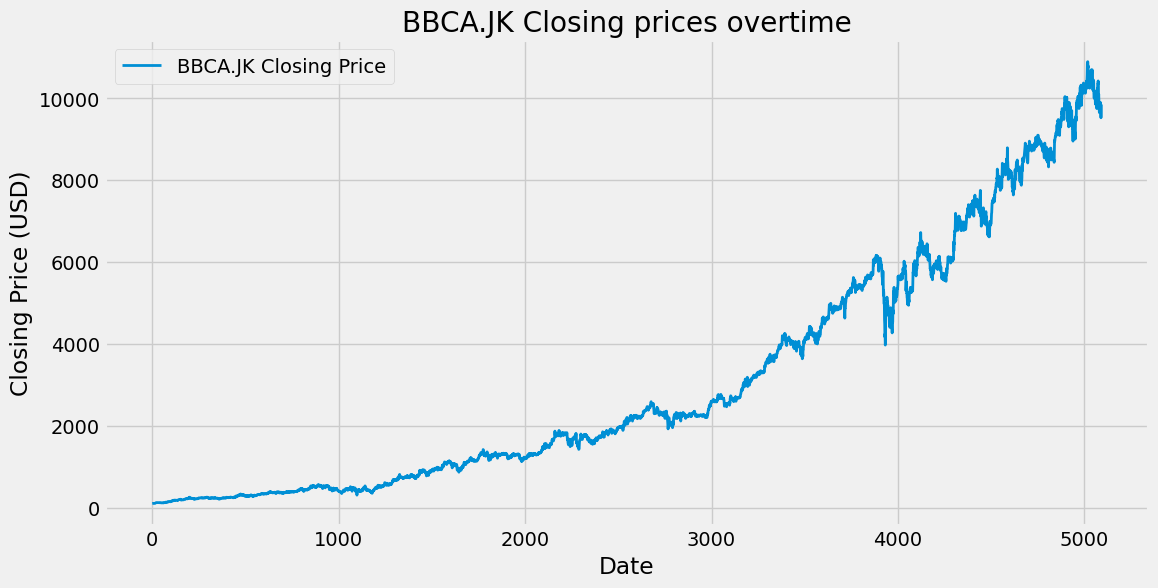

In [23]:
plt.figure(figsize = (12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.title(f'{stock} Closing prices overtime')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

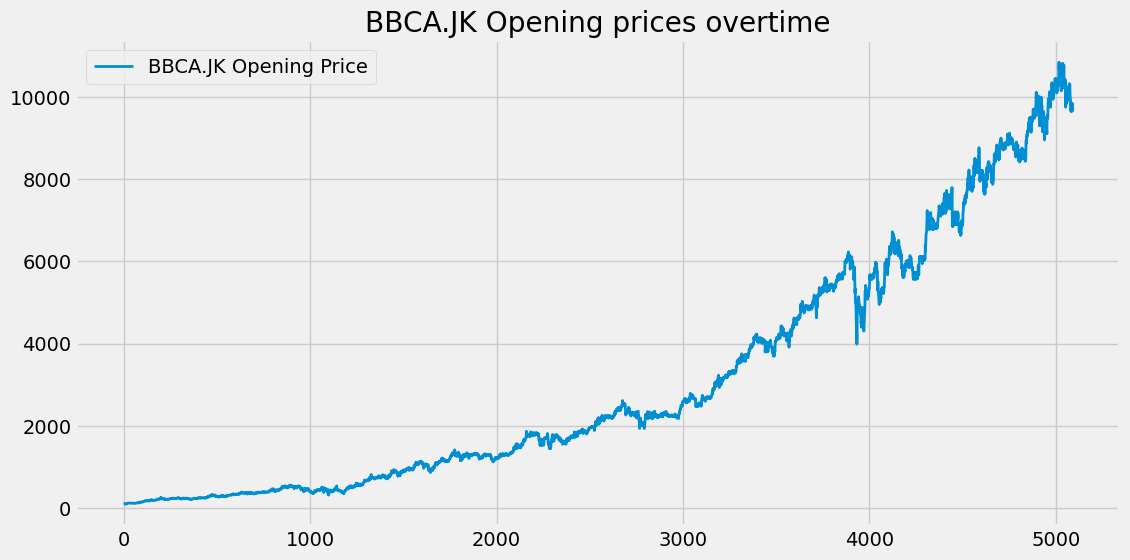

In [24]:
plt.figure(figsize = (12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening prices overtime')
plt.legend()
plt.show()

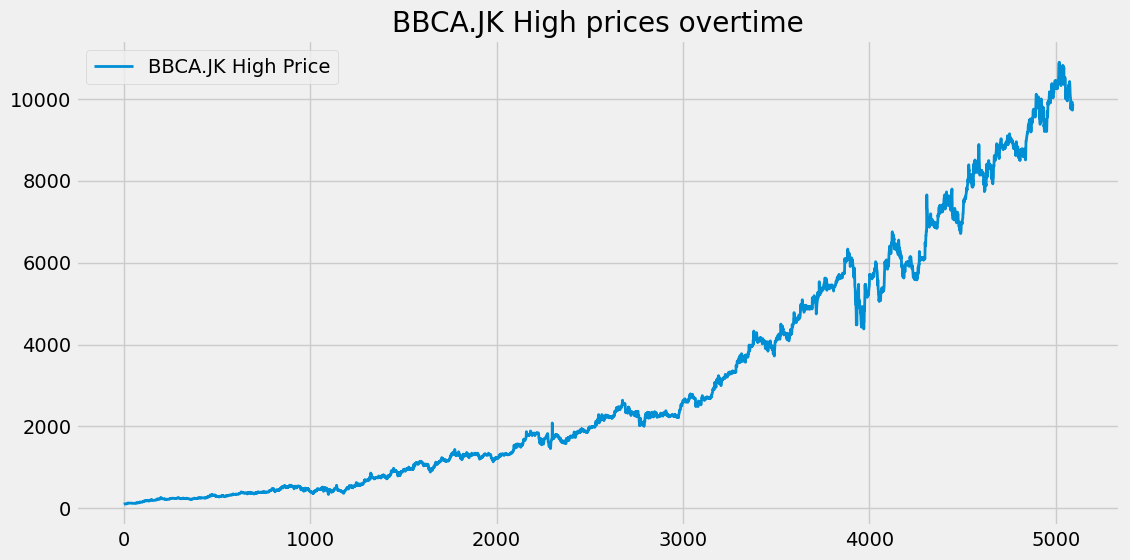

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 2)
plt.title(f'{stock} High prices overtime')
plt.legend()
plt.show()

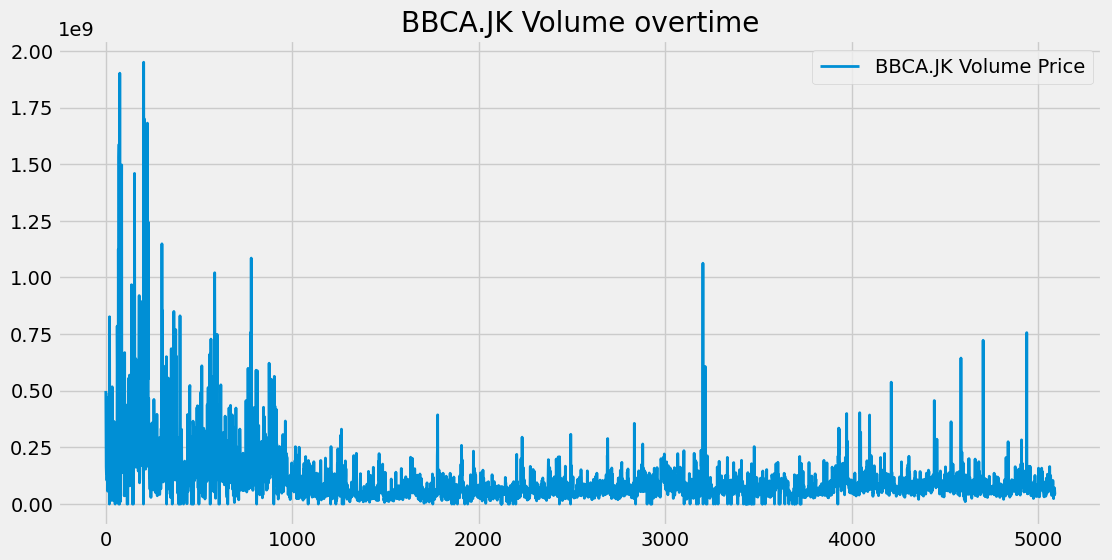

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume Price', linewidth = 2)
plt.title(f'{stock} Volume overtime')
plt.legend()
plt.show()

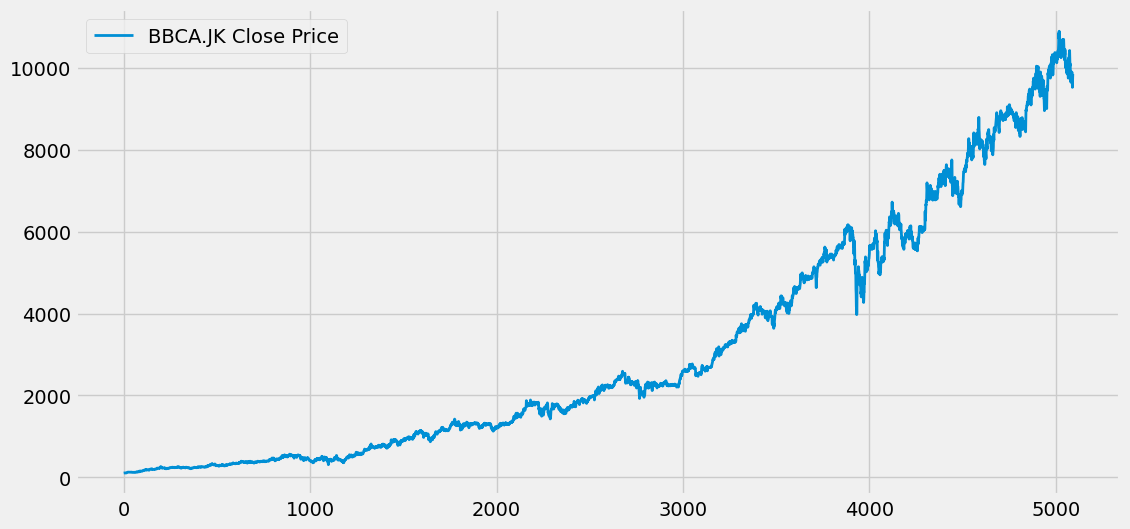

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 2)
plt.legend()
plt.show()

In [29]:
ema100 = df.Close.ewm(span = 100, adjust = False).mean()

In [31]:
ema200 = df['Close'].ewm(span = 200, adjust = False).mean()

In [33]:
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK,BBCA.JK
0,NaN,NaN,NaN,NaN,NaN
1,0.014085,1.388893e-02,4.330792e-08,0.014286,-0.410418
2,0.000000,-1.369863e-02,1.428571e-02,0.014085,-0.437324
3,0.000000,0.000000e+00,0.000000e+00,-0.013889,-0.179721
4,-0.013889,-4.330791e-08,-1.408455e-02,0.014084,0.167194
...,...,...,...,...,...
5087,-0.005051,2.525253e-03,1.813472e-02,0.020725,0.099442
5088,-0.017766,-5.037783e-03,-1.781170e-02,0.000000,-0.007684
5089,-0.015504,-1.518987e-02,-1.295337e-02,-0.017766,0.714641


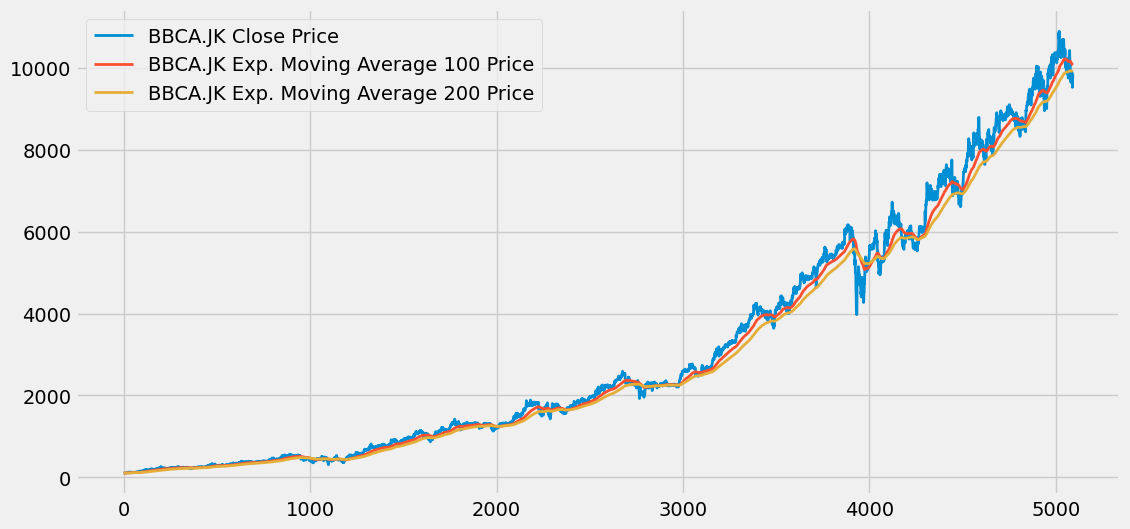

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 2)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 2)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 2)
plt.legend()
plt.show()

In [36]:
# Training & Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [37]:
data_training.shape

(3564, 1)

In [38]:
data_testing.shape

(1528, 1)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [40]:
data_training_array = scaler.fit_transform(data_training)

In [42]:
data_training_array

array([[0.00000000e+00],
       [3.34598896e-04],
       [3.34598896e-04],
       ...,
       [9.49986161e-01],
       [9.60192991e-01],
       [9.57130818e-01]])

In [43]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [44]:
x_train.shape

(3464, 100, 1)

# **MODEL BUILDING**

In [46]:
!pip install keras
!pip install tensorflow

from keras.layers import Dense, Dropout, LSTM # Corrected the typo from 'layes' to 'layers'
from keras.models import Sequential

In [47]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          86,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,081 (597.97 KB)

 Trainable params: 153,081 (597.97 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 41s 316ms/step - loss: 0.0485
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 43s 339ms/step - loss: 0.0046
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 45s 378ms/step - loss: 0.0045
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 32s 292ms/step - loss: 0.0037
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 31s 286ms/step - loss: 0.0034
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 45s 322ms/step - loss: 0.0033
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 44s 353ms/step - loss: 0.0034
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 35s 297ms/step - loss: 0.0032
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 42s 388ms/step - loss: 0.0027
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 83s 402ms/step - loss: 0.0029
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 80s 385ms/step - loss: 0.0027
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 75s 316ms/step - loss: 0.0027
Epoch 13/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 404ms/step - loss: 0.0023
Epoch 14/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 37s 339ms/step - loss: 0.0020
Epoch 15/50
109

In [52]:
past_100_days = data_training.tail(100)

In [56]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [57]:
input_data = scaler.fit_transform(final_df)

In [58]:
final_df.head()

Ticker,BBCA.JK
0,4009.033691
1,4009.033691
2,4048.770508
3,4013.448975
4,4066.431885


In [59]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_train), np.array(y_train)

In [60]:
x_test.shape

(3464, 100, 1)

In [61]:
y_predict = model.predict(x_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step


In [62]:
scaler.scale_

array([0.00013779])

In [64]:
scaler_factor = 1 / 0.00013779
y_predict = y_predict * scaler_factor
y_test = y_test * scaler_factor

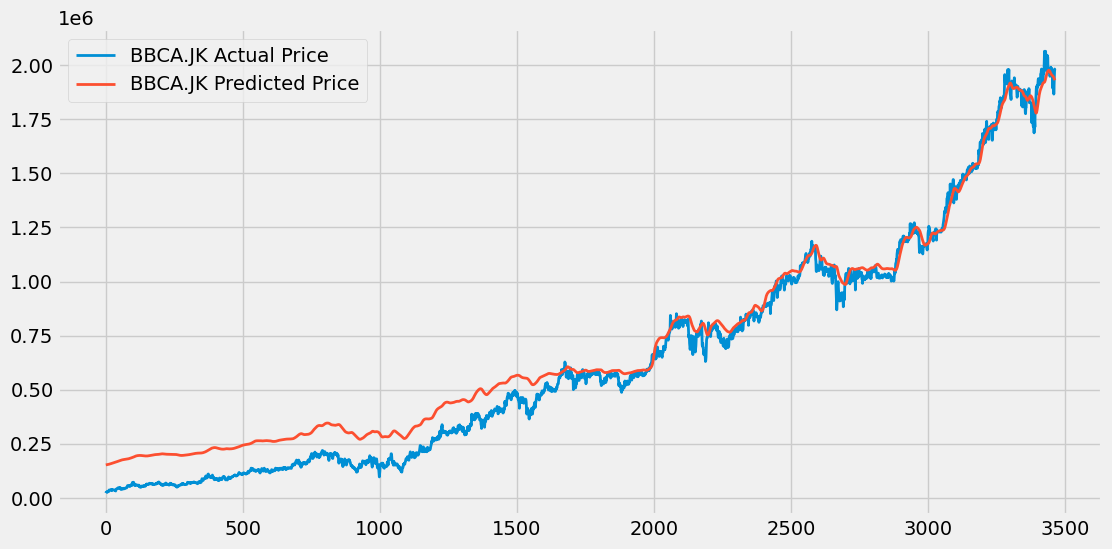

In [65]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, label = f'{stock} Actual Price', linewidth = 2)
plt.plot(y_predict, label = f'{stock} Predicted Price', linewidth = 2)
plt.legend()
plt.show()

In [66]:
model.save('stock_dl_model.h5')